*  # Introduction
  # How does air affect agriculture?
Agricultural crops can be injured when exposed to high concentrations of various air pollutants. Injury ranges from visible markings on the foliage, to reduced growth and yield, to premature death of the plant
   

* # Context
  This dataset contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. This dataset was taken from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/index.php

* # Content
The dataset contains 9357 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts .

* # Main Features


    PT08.S1(CO)-Tin oxide hourly averaged sensor response (nominally CO targeted).

    C6H6(GT)-True hourly averaged Benzene concentration in microg/m^3 (reference analyzer).

    PT08.S2(NMHC)-Titania hourly averaged sensor response (nominally NMHC targeted).

    NOx(GT)-True hourly averaged NOx concentration in ppb (reference analyzer)

    PT08.S3(NOx)-Tungsten oxide hourly averaged sensor response (nominally NOx targeted).

    NO2(GT)-True hourly averaged NO2 concentration in microg/m^3 (reference analyzer).
    
    PT08.S4 (tungsten oxide)-hourly averaged sensor response (nominally NO2 targeted).
    
    PT08.S5 (indium oxide)-hourly averaged sensor response (nominally O3 targeted).

    Temperature-Temperature in Â°C.

    Humidity-Relative Humidity (%).
    
    AH-Absolute Humidity.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#read the dataset

ar = pd.read_csv('AirQualityUCI/AirQualityUCI.csv', sep=';', decimal=',')
ar.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [5]:
ar.shape


(9471, 17)

In [51]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [52]:
ar.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [53]:
#Dropping CO(GT) and Unnamed columns
ar.drop(['Unnamed: 15','Unnamed: 16'],axis = 1,inplace = True)

In [54]:
#Formatting some object columns from strings to floats

ar.replace(to_replace=',',value='.',regex=True,inplace=True) 

for i in 'C6H6(GT) T RH AH'.split():
    ar[i] = pd.to_numeric(ar[i],errors='coerce') 

In [55]:
#Replacing null data from -200 to NaN for posterior treatment

ar.replace(to_replace=-200,value=np.nan,inplace=True)

ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [56]:
#Formatting Date and Time to datetime type

ar['Date'] = pd.to_datetime(ar['Date'],dayfirst=True) 

ar['Time'] = pd.to_datetime(ar['Time'],format= '%H.%M.%S' ).dt.time

ar.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [57]:
NMHC_ratio = ar['NMHC(GT)'].isna().sum()/len(ar['NMHC(GT)'])

print('The NMHC(GT) sensor has {:.2f}% of missing data.'.format(NMHC_ratio*100))

The NMHC(GT) sensor has 90.35% of missing data.


In [58]:
#Removing NMHC(GT) sensor due to amount of null values

ar.drop('NMHC(GT)', axis=1, inplace=True) 

ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   C6H6(GT)       8991 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        7718 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        7715 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T              8991 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1.0+ MB


rechecking the null values in the new dataframe

In [59]:
# to know if there null values or not
ar.apply(lambda x: len(x.isnull()))

Date             9471
Time             9471
CO(GT)           9471
PT08.S1(CO)      9471
C6H6(GT)         9471
PT08.S2(NMHC)    9471
NOx(GT)          9471
PT08.S3(NOx)     9471
NO2(GT)          9471
PT08.S4(NO2)     9471
PT08.S5(O3)      9471
T                9471
RH               9471
AH               9471
dtype: int64

In [60]:
ar.isnull().sum()

Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64

In [61]:
ar1=ar.dropna()

In [62]:
 # to check again
ar1.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [63]:
ar1.shape

(6941, 14)

In [64]:
# Eliminating all duplicated rows with drop_duplicates
ar1.drop_duplicates(inplace= True)

In [65]:
# To check whether there duplicated values or not using the function Assert 
assert ar1.duplicated().sum() == 0

In [66]:
# To check wether there unique values in Dataset
ar1.apply(lambda x: len(x.unique()))

Date              341
Time               24
CO(GT)             94
PT08.S1(CO)      1016
C6H6(GT)          392
PT08.S2(NMHC)    1189
NOx(GT)           896
PT08.S3(NOx)     1129
NO2(GT)           274
PT08.S4(NO2)     1543
PT08.S5(O3)      1693
T                 428
RH                742
AH               5460
dtype: int64

In [67]:
ar1.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000
mean,2.182467,1119.913269,10.554488,958.543005,250.671949,816.893387,113.874082,1452.648898,1057.756519,17.755323,48.881905,0.985573
std,1.441158,218.733754,7.465226,264.055002,208.611371,251.897200,47.475017,353.301576,406.509957,8.844909,17.433193,0.401097
min,0.100000,647.000000,0.200000,390.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,956.000000,4.900000,760.000000,103.000000,642.000000,79.000000,1207.000000,760.000000,11.200000,35.300000,0.694100
50%,1.900000,1085.000000,8.800000,931.000000,186.000000,786.000000,110.000000,1457.000000,1006.000000,16.800000,49.200000,0.953900
75%,2.900000,1254.000000,14.600000,1135.000000,335.000000,947.000000,142.000000,1683.000000,1322.000000,23.700000,62.200000,1.251600
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600


In [68]:
ar1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6941 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6941 non-null   datetime64[ns]
 1   Time           6941 non-null   object        
 2   CO(GT)         6941 non-null   float64       
 3   PT08.S1(CO)    6941 non-null   float64       
 4   C6H6(GT)       6941 non-null   float64       
 5   PT08.S2(NMHC)  6941 non-null   float64       
 6   NOx(GT)        6941 non-null   float64       
 7   PT08.S3(NOx)   6941 non-null   float64       
 8   NO2(GT)        6941 non-null   float64       
 9   PT08.S4(NO2)   6941 non-null   float64       
 10  PT08.S5(O3)    6941 non-null   float64       
 11  T              6941 non-null   float64       
 12  RH             6941 non-null   float64       
 13  AH             6941 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 813.4+ KB


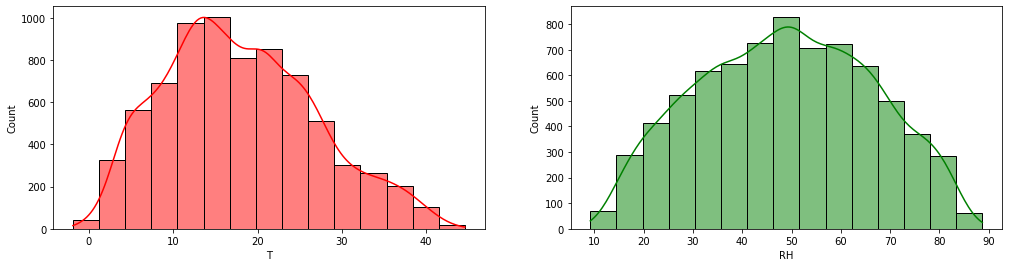

In [24]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(ar1["T"],stat="count",color="red",bins=15,kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(ar1.RH,stat="count",color = "green",bins=15,kde={'alpha':0.5})
plt.show()


<AxesSubplot:xlabel='AH', ylabel='Count'>

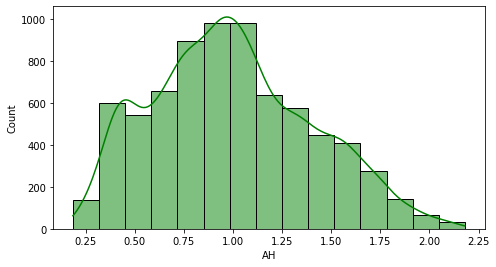

In [25]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(ar1.AH,stat="count",color="green",bins=15,kde={'alpha':0.5})

In [26]:
#Checking the Statistics for all the AQ
print("Average Ratio of (sensor)Tin oxide(nominally CO targeted) : {0: .2f}".format(ar1['PT08.S1(CO)'].mean()))
print("Average Ratio of Benzene in microg/m^3 : {0: .2f}".format(ar1['C6H6(GT)'].mean()))
print("Average Ratio of (sensor)Non-Methane Hydrocarbons : {0: .2f}".format(ar1['PT08.S2(NMHC)'].mean()))
print("Average Ratio of Nitrogen Oxides in ppb : {0: .2f}".format(ar1['NOx(GT)'].mean()))
print("Average Ratio of (sensor)Tungsten oxide(nominally NOx targeted) : {0: .2f}".format(ar1['PT08.S3(NOx)'].mean()))
print("Average Ratio of true hourly averaged NO2(Nitrogen dioxide) : {0: .2f}".format(ar1['NO2(GT)'].mean()))
print("Average Ratio of (sensor)tungsten oxide(nominally NO2 targeted) : {0: .2f}".format(ar1['PT08.S4(NO2)'].mean()))
print("Average Ratio of (sensor)indium oxide(nominally O3 targeted) : {0: .2f}".format(ar1['PT08.S5(O3)'].mean()))
print("Average temperature in Celsius: {0: .2f}".format(ar1['T'].mean()))
print("Average Relative Humidity in % : {0: .2f}".format(ar1['AH'].mean()))
print("Average Absolute Humidity : {0: .2f}".format(ar1['RH'].mean()))

Average Ratio of (sensor)Tin oxide(nominally CO targeted) :  1112.12
Average Ratio of Benzene in microg/m^3 :  10.36
Average Ratio of (sensor)Non-Methane Hydrocarbons :  950.65
Average Ratio of Nitrogen Oxides in ppb :  242.23
Average Ratio of (sensor)Tungsten oxide(nominally NOx targeted) :  824.57
Average Ratio of true hourly averaged NO2(Nitrogen dioxide) :  112.15
Average Ratio of (sensor)tungsten oxide(nominally NO2 targeted) :  1452.01
Average Ratio of (sensor)indium oxide(nominally O3 targeted) :  1045.72
Average temperature in Celsius:  17.96
Average Relative Humidity in % :  0.99
Average Absolute Humidity :  48.78


In [27]:
sns.set_theme(style="whitegrid")

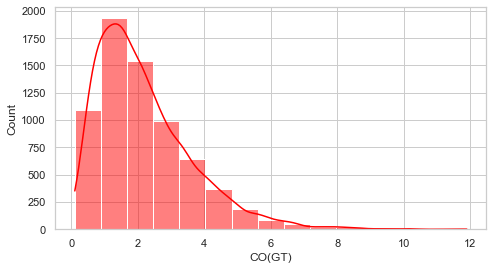

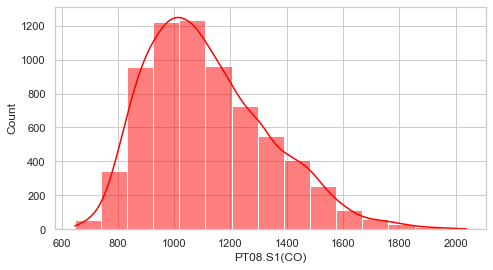

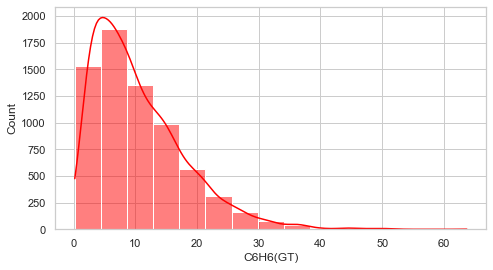

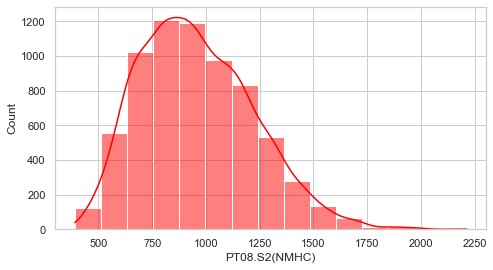

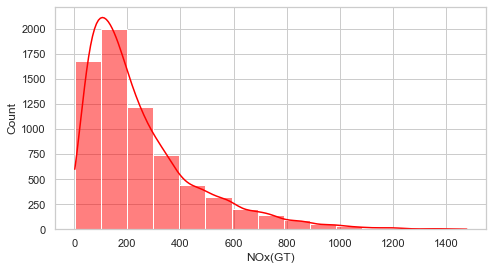

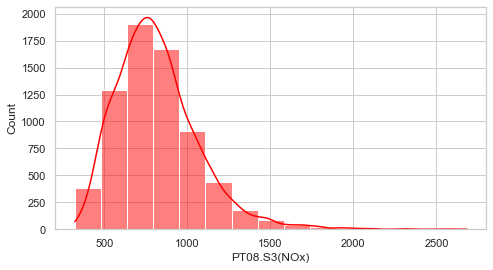

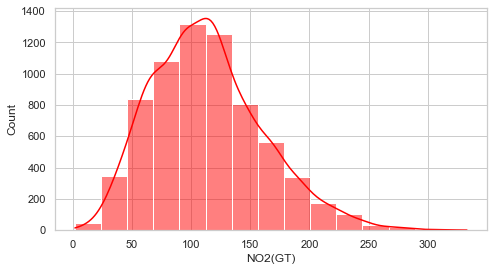

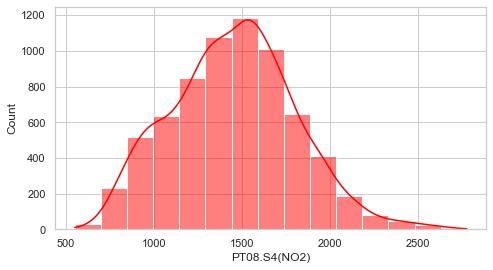

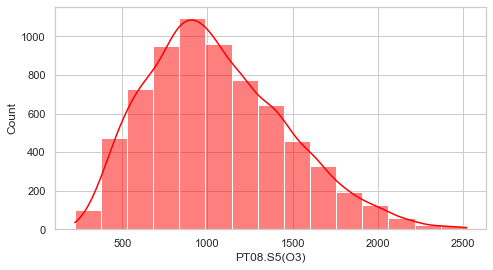

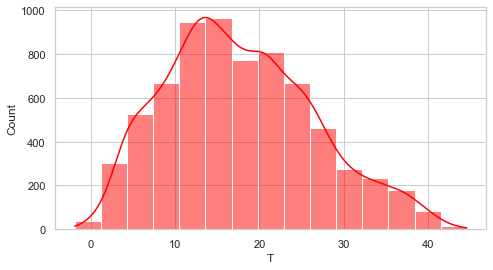

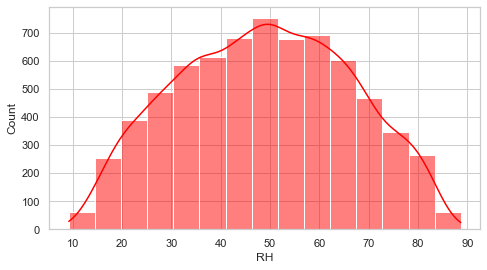

In [69]:
for i in ar1.columns[2:13]:
    plt.figure(figsize=(17,9))
    plt.subplot(2,2,1)
    sns.histplot(x=ar1[i],stat="count",color="red",bins=15,kde={'alpha':0.5})
    

In [70]:
#Removing NOx(GT) and NO2(GT) sensor data due the ammount of null values if compared to other sensors

# pd.options.mode.chained_assignment = None
# ar1.drop(['NOx(GT)','NO2(GT)'],axis=1, inplace=True)
ar1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6941 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6941 non-null   datetime64[ns]
 1   Time           6941 non-null   object        
 2   CO(GT)         6941 non-null   float64       
 3   PT08.S1(CO)    6941 non-null   float64       
 4   C6H6(GT)       6941 non-null   float64       
 5   PT08.S2(NMHC)  6941 non-null   float64       
 6   NOx(GT)        6941 non-null   float64       
 7   PT08.S3(NOx)   6941 non-null   float64       
 8   NO2(GT)        6941 non-null   float64       
 9   PT08.S4(NO2)   6941 non-null   float64       
 10  PT08.S5(O3)    6941 non-null   float64       
 11  T              6941 non-null   float64       
 12  RH             6941 non-null   float64       
 13  AH             6941 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 813.4+ KB


In [71]:
#Eliminating rows with NaN values 

ar1_filt = ar1.dropna(how='any', axis=0)
ar1_filt.reset_index(drop=True,inplace=True)

In [72]:
ar1_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6941 entries, 0 to 6940
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6941 non-null   datetime64[ns]
 1   Time           6941 non-null   object        
 2   CO(GT)         6941 non-null   float64       
 3   PT08.S1(CO)    6941 non-null   float64       
 4   C6H6(GT)       6941 non-null   float64       
 5   PT08.S2(NMHC)  6941 non-null   float64       
 6   NOx(GT)        6941 non-null   float64       
 7   PT08.S3(NOx)   6941 non-null   float64       
 8   NO2(GT)        6941 non-null   float64       
 9   PT08.S4(NO2)   6941 non-null   float64       
 10  PT08.S5(O3)    6941 non-null   float64       
 11  T              6941 non-null   float64       
 12  RH             6941 non-null   float64       
 13  AH             6941 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 759.3+ KB


In [32]:
#Adding a column with the week days 

ar1_filt['Week Day'] = ar1_filt['Date'].dt.day_name() 

#Rearranging columns

cols = ar1_filt.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:11]
ar1_filt = ar1_filt[cols]
ar1_filt.head(10)

,Date,Week Day,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,Wednesday,18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,Wednesday,19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,Wednesday,20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,Wednesday,21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,Wednesday,22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
5,2004-03-10,Wednesday,23:00:00,1197.0,4.7,750.0,1337.0,1393.0,949.0,11.2,59.2,0.7848
6,2004-03-11,Thursday,00:00:00,1185.0,3.6,690.0,1462.0,1333.0,733.0,11.3,56.8,0.7603
7,2004-03-11,Thursday,01:00:00,1136.0,3.3,672.0,1453.0,1333.0,730.0,10.7,60.0,0.7702
8,2004-03-11,Thursday,02:00:00,1094.0,2.3,609.0,1579.0,1276.0,620.0,10.7,59.7,0.7648
9,2004-03-11,Thursday,04:00:00,1011.0,1.3,527.0,1818.0,1197.0,445.0,10.1,60.5,0.7465


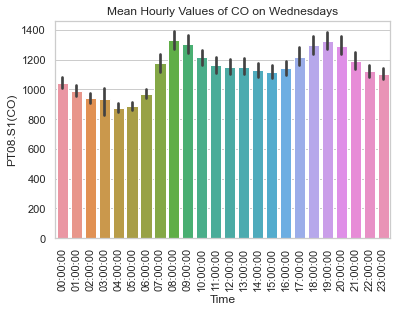

In [33]:
#Creating new dataframe with only wednesday data

ar1_wed = ar1_filt[ar1_filt['Week Day'] == 'Wednesday']

#Plotting the mean hourly value of CO on Wednesdays

sns.barplot(x='Time',y='PT08.S1(CO)', data=ar1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of CO on Wednesdays')
plt.xticks(rotation=90)
plt.show()

In [34]:
#The peak concentration of CO in the city are between 8 AM and 9 AM and between 6 PM and 8 PM,
#beginnings and endings of office hours, respectively.

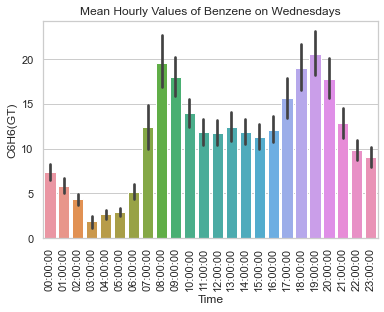

In [35]:
#Plotting the mean hourly value of Benzene on Wednesdays

sns.barplot(x='Time',y='C6H6(GT)', data=ar1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of Benzene on Wednesdays')
plt.xticks(rotation=90)
plt.show()

In [36]:
#The peak concentration of Benzene in the city are between 8 AM and 9 AM and between 6 PM and 7 PM,
#beginnings and endings of office hours, respectively.

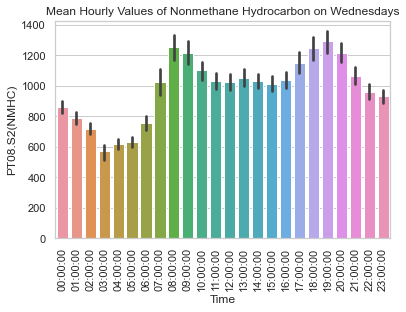

In [37]:
#Plotting the mean hourly value of Nonmethane Hydrocarbon on Wednesdays

sns.barplot(x='Time',y='PT08.S2(NMHC)', data=ar1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of Nonmethane Hydrocarbon on Wednesdays')
plt.xticks(rotation=90)
plt.show()


In [38]:
#The peak concentration of Nonmethane Hydrocarbon in the city are between 8 AM and 9 AM and between 6 PM and 7 PM,
#beginnings and endings of office hours, respectively.

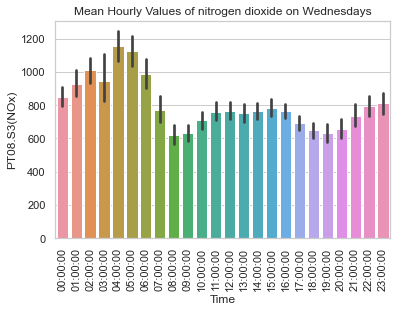

In [39]:
#Plotting the mean hourly value of nitrogen dioxide on Wednesdays

sns.barplot(x='Time',y='PT08.S3(NOx)', data=ar1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of nitrogen dioxide on Wednesdays')
plt.xticks(rotation=90)
plt.show()

In [40]:
#The peak concentration of nitrogen dioxide in the city are between 4 AM and 5 AM and between 10 PM and 11 PM,


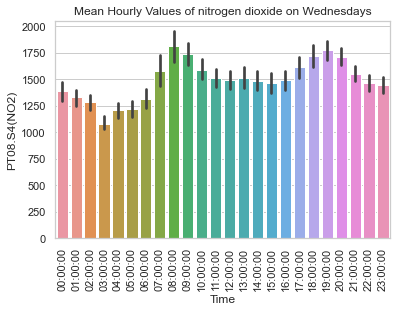

In [41]:
#Plotting the mean hourly value of nitrogen dioxide on Wednesdays

sns.barplot(x='Time',y='PT08.S4(NO2)', data=ar1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of nitrogen dioxide on Wednesdays')
plt.xticks(rotation=90)
plt.show()

In [42]:
#The peak concentration of nitrogen dioxide in the city are between 8 AM and 9 AM and between 6 PM and 8 PM.


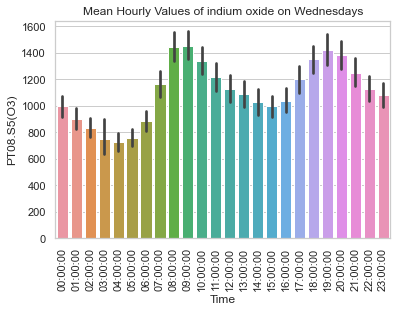

In [43]:
#Plotting the mean hourly value of indium oxide on Wednesdays

sns.barplot(x='Time',y='PT08.S5(O3)', data=ar1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of indium oxide on Wednesdays')
plt.xticks(rotation=90)
plt.show()

In [44]:
#The peak concentration of indium oxide in the city are between 8 AM and 9 AM and between 7 PM and 8 PM.


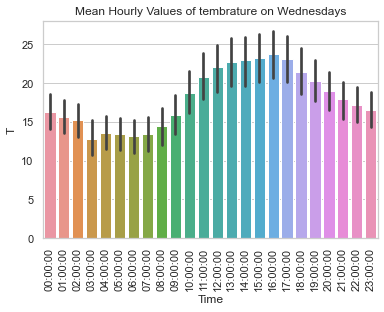

In [45]:
sns.barplot(x='Time',y='T', data=ar1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of tembrature on Wednesdays')
plt.xticks(rotation=90)
plt.show()

In [46]:
#The peak concentration of indium oxide in the city are between 10 AM and 11 AM and between 3 PM and 4 PM.


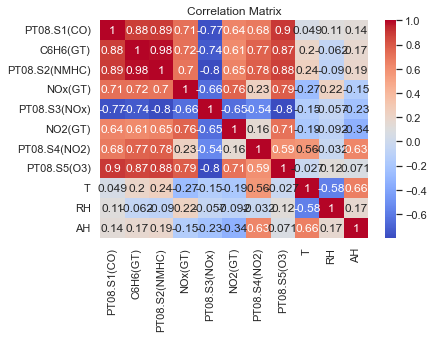

In [47]:
#Plotting correlation matrix

sns.heatmap(ar.corr(),annot=True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
sns.pairplot(ar1)
plt.show()